# import necessary libraries

In [99]:
pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [101]:
iris_df = pd.read_csv("C://Users//Thanisha//Downloads//Iris.csv")
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [102]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [103]:
iris_df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing the dataset

In [104]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [105]:
#Assuming the traget variable is in a column named 'Species'
X = iris_df.drop('Species', axis=1) #Features
Y = iris_df['Species'] #Target variable 

In [106]:
#Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
iris_df['Species']=label_encoder.fit_transform(iris_df['Species'])
iris_df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [107]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [108]:
#split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [109]:
#standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# EDA

<Axes: >

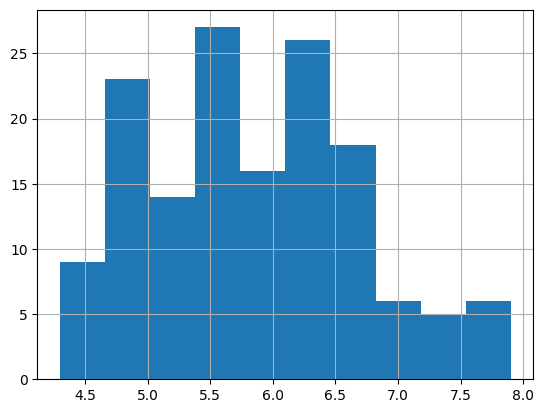

In [110]:
#plotting Histograms for each feature
iris_df['SepalLengthCm'].hist()

<Axes: >

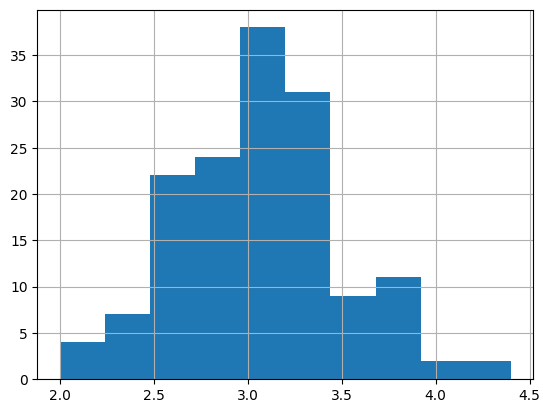

In [111]:
iris_df['SepalWidthCm'].hist()

<Axes: >

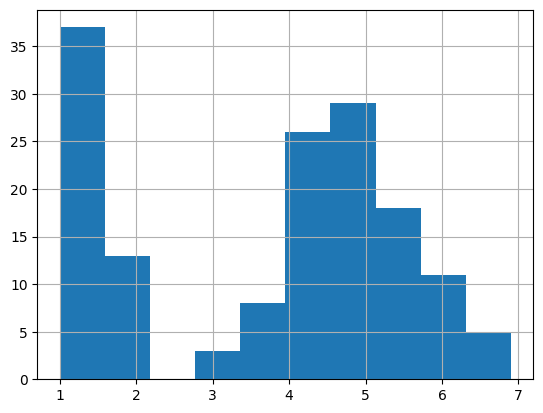

In [112]:
iris_df['PetalLengthCm'].hist()

<Axes: >

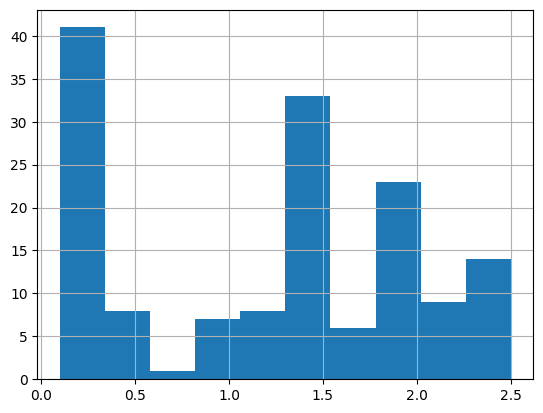

In [113]:
iris_df['PetalWidthCm'].hist()

<Axes: >

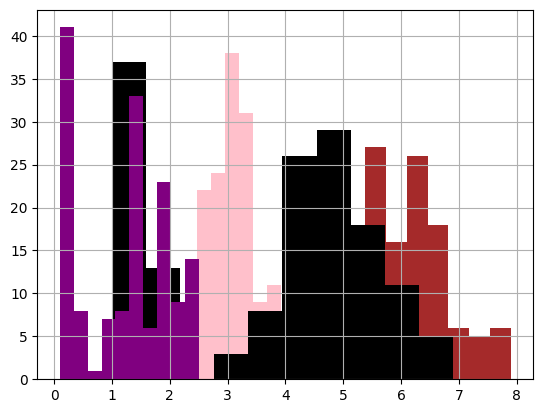

In [114]:
#all features
iris_df['SepalLengthCm'].hist(color='brown')
iris_df['SepalWidthCm'].hist(color='pink')
iris_df['PetalLengthCm'].hist(color='black')
iris_df['PetalWidthCm'].hist(color='purple')

<Axes: xlabel='Species', ylabel='count'>

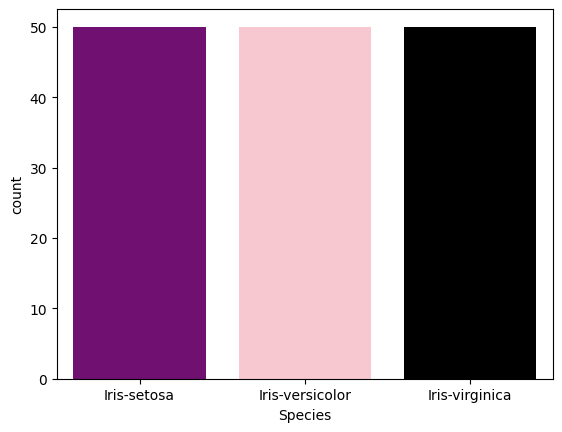

In [115]:
sns.countplot(x='Species' ,data=df,palette=['purple','pink','black'])

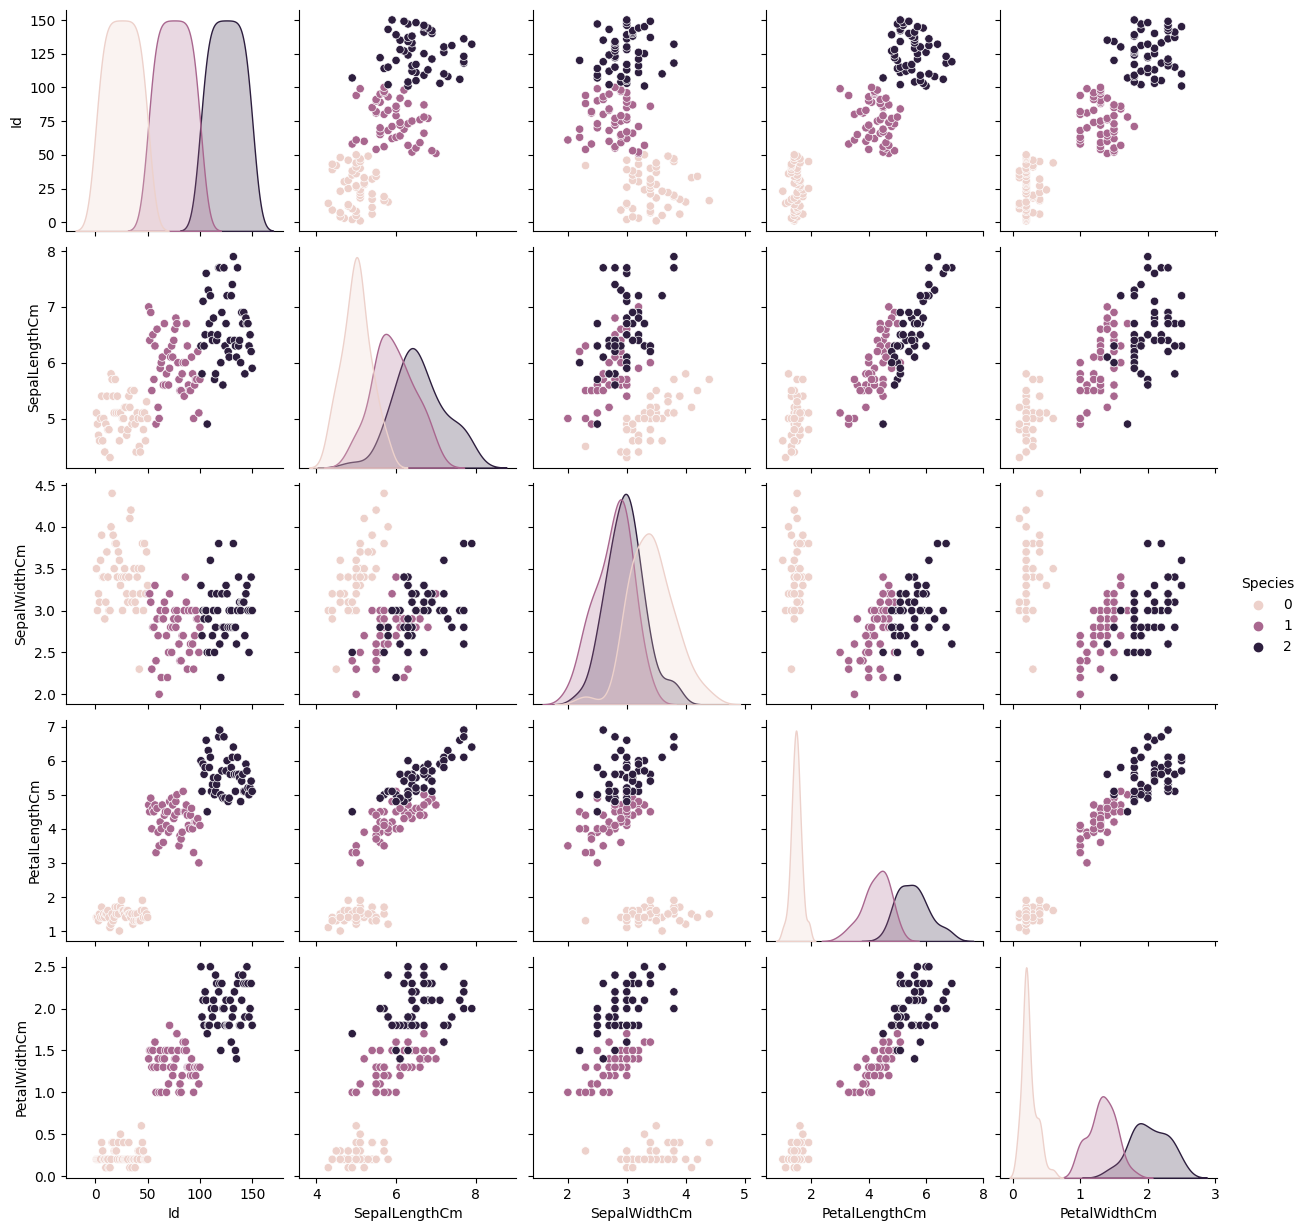

In [116]:
sns.pairplot(iris_df,hue='Species')

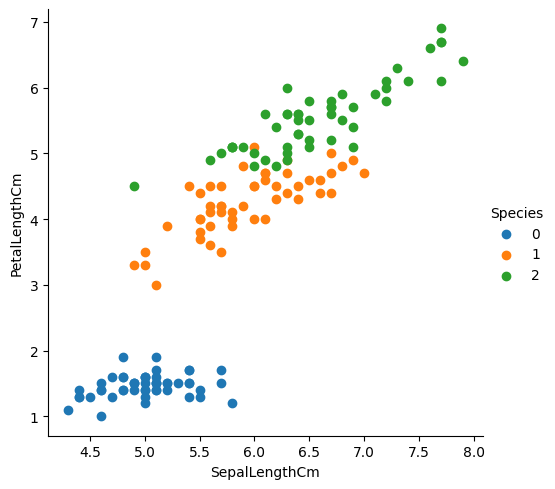

In [117]:
sns.FacetGrid(iris_df,hue='Species' ,height=5).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

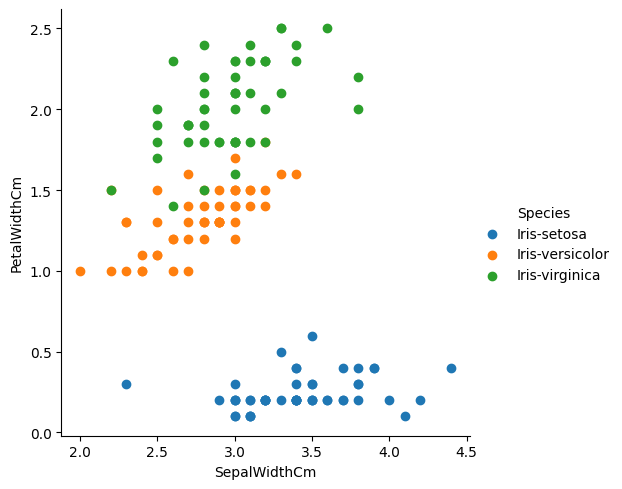

In [118]:
sns.FacetGrid(df,hue='Species',height=5).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()


# correlation matrix

In [119]:
#correlation matrix
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

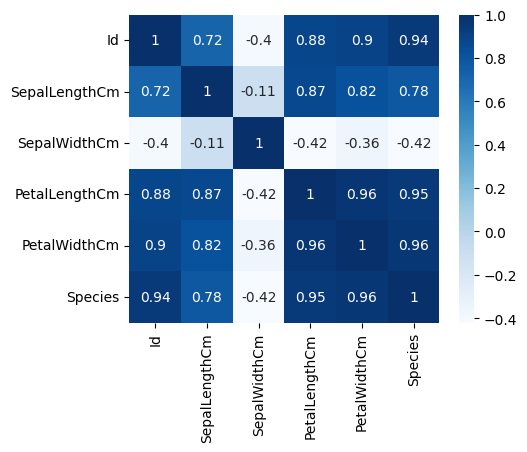

In [120]:
corr = iris_df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='Blues')

# Model Training

In [121]:
#create a K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [122]:
#Train the model
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [123]:
Y_pred = knn_classifier.predict(X_test)

In [124]:
# Evaluate the model accuracy
# model accuracy
print("Accuracy(K-nearest neighbors): ",knn_classifier.score(X_test,Y_test)*100)

Accuracy(K-nearest neighbors):  100.0


In [125]:
#create logistic regression model
from sklearn.linear_model import LogisticRegression
logisticreg_classifier=LogisticRegression()

# model fitting
logisticreg_classifier.fit(X_train,Y_train)

# model accuracy
print("Accuracy(Logistic Regression): ",logisticreg_classifier.score(X_test,Y_test)*100)
accuracy_logisticreg = logisticreg_classifier.score(X_test,Y_test)*100

Accuracy(Logistic Regression):  100.0


In [126]:
#create deciaion tree model
from sklearn.tree import DecisionTreeClassifier

In [127]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = dt_classifier.predict(X_test)

In [128]:
# model accuracy
print("Accuracy(Decision Tree): ",dt_classifier.score(X_test,Y_test)*100)
accuracy_dt = dt_classifier.score(X_test,Y_test)*100

Accuracy(Decision Tree):  100.0


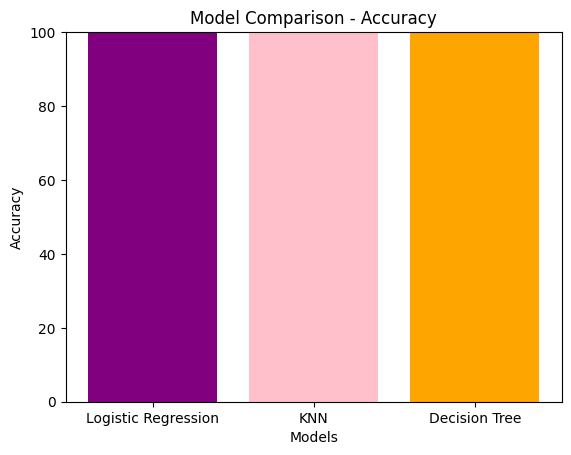

In [129]:
# Model Comparison - Visualization
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [accuracy_logisticreg, accuracy_knn, accuracy_dt]

plt.bar(models, accuracies, color=['purple', 'pink', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()